# Home Assignment -- 1

In this part of the homework you are asked implement some "interesting" functions
usinig Numpy. You are advised to **avoid using python loops**.

At the same time you are **encouraged** to google anything and read relevant
documentation, e.g. for [Numpy](https://docs.scipy.org/doc/numpy/reference/)
[matlpotlib](https://matplotlib.org/) and [python](https://docs.python.org/3/).

Please, write your solutions within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```

# Part 1 (28 + 7 pt.): Numpy and (some) Matplotlib

Let's import numpy, fix the randomness, and then import matplotlib.

In [1]:
import numpy as np
np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt

<br/>

## Task 1 (1 pt.)

Write a function, that returns an $n \times m$ integer matrix with
a specified value on the border and another specified value inside.

You might want to study numpy's indexing and [array creation](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html).

In [2]:
def make_bordered_matrix(n_rows, n_cols, fill_value=1, border_value=0):
    """Constructs a bordered (n x m) matrix.
    
    Parameters
    ----------
    n_rows : int
        Nonnegative integer, spcifying the number of rows.
    n_cols : int
        Nonnegative integer, spcifying the number of columns.
    fill_value : float
        The value to fill the matrix with.
    border_value : float
        The value to set the border of the matrix to.
    
    Returns
    -------
    arr : array, 2 dimensional, shape = (n_rows, n_cols)
        The final bordered matrix.
    """
    ### BEGIN Solution
    out = np.ones( (n_rows,n_cols) )*fill_value
    out[:,0]=border_value
    out[:,n_cols-1]=border_value
    out[0,1:-1]=border_value
    out[n_rows-1,1:-1]=border_value    
    ### END Solution

    return out


<br/>

## Task 2 (1 pt.)

Implement a routine, which creates a binary checkerboard matrix with the specified
shape.

Example 4x4:
```python
[[0, 1, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 0]]
```

In [3]:
def make_binary_checkerboard_matrix(n_rows, n_cols):
    """Construct an n x m matrix with checkerboard pattern of 0 and 1.
    
    Parameters
    ----------
    n_rows : int
        Nonnegative integer, spcifying the number of rows.
    n_cols : int
        Nonnegative integer, spcifying the number of columns.
    
    Returns
    -------
    arr : array, 2 dimensional, shape = (n_rows, n_cols)
        The final checkerboard matrix.
    """
    ### BEGIN Solution
    out = np.zeros( (n_rows, n_cols) )
    ii, jj = np.indices( (n_rows, n_cols) )
    out[(ii-jj) % 2 == 1] = 1
    ### END Solution

    return out


<br/>

## Task 3 (1 pt.)

Write a function that shifts and scales a given array `arr` so that its values
lie within $[0, 1]$.

In [4]:
def normalize(arr):
    """Shift and scale the array to fit it within [0, 1].
    
    Parameters
    ----------
    arr : array, multidimensional
        The array to be normalized.
    
    Returns
    -------
    out : array
        The normalized array.
    """
    ### BEGIN Solution
    minVal = np.min(arr)
    out = (arr - minVal)/(np.max(arr)-minVal)
    ### END Solution

    return out



<br/>

## Task 4 (1 pt.)

Write a function, which takes a matrix `arr` and centers each of its rows
by the mean within that row. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [5]:
def center(arr):
    """Center each row of a matrix by the mean value in that row.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the rows of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final row-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution
    out= arr -np.mean(arr, axis=1)[:, np.newaxis]
    ### END Solution

    return out


<br/>

## Task 5 (2 pt.)

Implement the following fancy function:
\begin{equation}
    f(x) = \sigma\bigl(
                \max\{x + 5, 0\} + \max\{5 - x, 0\}
                + \max\{\min\{\cos(2 x \pi), \tfrac12\}, -\tfrac14\}
            \bigr)
         \,,
\end{equation}
where $\sigma(x) = (1+e^{-x})^{-1}$ is the sigmoid function.

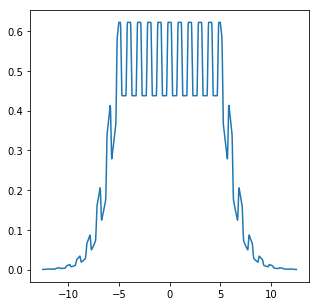

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def fancy_function(x):
    """Compute some fancy function.
    
    Parameters
    ----------
    X : array, 1 dimendional, shape=(n_samples,)
        The array argument values.

    Returns
    -------
    y : array, 1 dimendional, shape=(n_samples,)
        The values of the fancy function.
    """
    ### BEGIN Solution
    out = sigmoid(np.maximum(x+5,0)+np.maximum(5-x,0)+np.maximum(np.minimum(np.cos(2*np.pi*x),0.5),-0.25) )
    ### END Solution
    
    return out

Plot the function

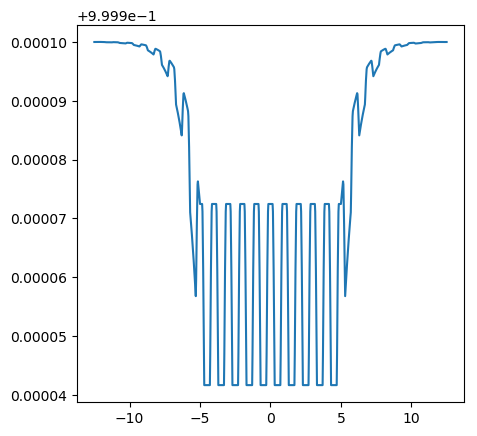

In [7]:
x = np.linspace(-12.5, 12.5, num=1001)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, fancy_function(x))
plt.show()

<br/>

## Task 6 (2 pt.)

Write a function that sorts the rows of a given matrix by the values of a
specified column in **descending order**.

In [8]:
def sort_by_column_desc(arr, col):
    """Sort the rows of a matrix in descending order of values in a specified column.

    Parameters
    ----------
    arr : array, 2 dimensional
        The array to sort.

    col : int
        The index of the column to sort the rows by.

    Returns
    ----------
    out : array, 2 dimensional
        The sorted array.
    
    """
    ### BEGIN Solution
    print(arr[:,col])
    out = arr[np.argsort(arr[:,col])[::-1],:]
    ### END Solution

    return out


<br/>

## Task 7 (4 pt.)

Write a function that takes two real valued matrices $X$ and $Y$ with different
number of rows and equal number of columns and outputs the nearest neighbours'
indices. Specifically, each row $i$ in the output matrix indexes the rows of $Y$
in order **from the closest to the farthest** from the $i$-th row of $X$.

**Remeber** to avoid explicit loops!

You might like to have a look at *np.linalg.norm* and *np.argsort*.
Example:
```python
>>> X = [[0, 1], [3, 1]]
>>> Y = [[1, 1], [2, 2], [-20, -20]]
>>> index_of_nearest(X, Y, norm=2.0)
array([[0, 1, 2],
       [1, 0, 2]])
```

In [9]:
def nearest_neighbours(X, Y, norm=2.0):
    """Index the rows of `Y` in increasing order of distance from each row in `X`.

    Parameters
    ----------
    X : array, 2 dimensional, shape = (n_samples, n_dim)
        The matrix, for the rows of which to find the closest row in `Y`.

    Y : array, 2 dimensional, shape = (n_reference, n_dim)
        The matrix, among the rows of which to seek the closest one for `X`.

    norm : float, positive
        The order of the l^p norm to use for computing the pairwise distances.

    Returns
    -------
    index : 2 dimensional
        The matrix of indices of the rows of `Y` for each vector in `X`
        in increasing order of distnace with respect to the l^p norm.

    """
    assert X.ndim == Y.ndim and X.ndim == 2

    ### BEGIN Solution
    out = X-Y.reshape((Y.shape[0],Y.shape[1],-1))
    out=(np.argsort(np.linalg.norm(out,axis=2,ord=norm),axis=0)).T
    ### END Solution

    return out

#X=np.array([[0,1],[3,1]])
#Y=np.array([[1,1],[2,2],[-20,-20]])
#nearest_neighbours(X, Y, norm=np.inf) #some tests

<br/>

## Task 8 (4+1 pt.)

Plot the level sets of the $l^p$ norm
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,.
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. You
will get extra points if you use *np.linalg.norm* (which is more numerically stable).

Try to produce a plot that **looks like the one below**:
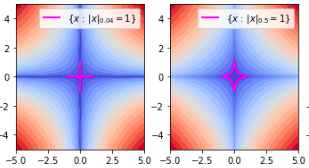

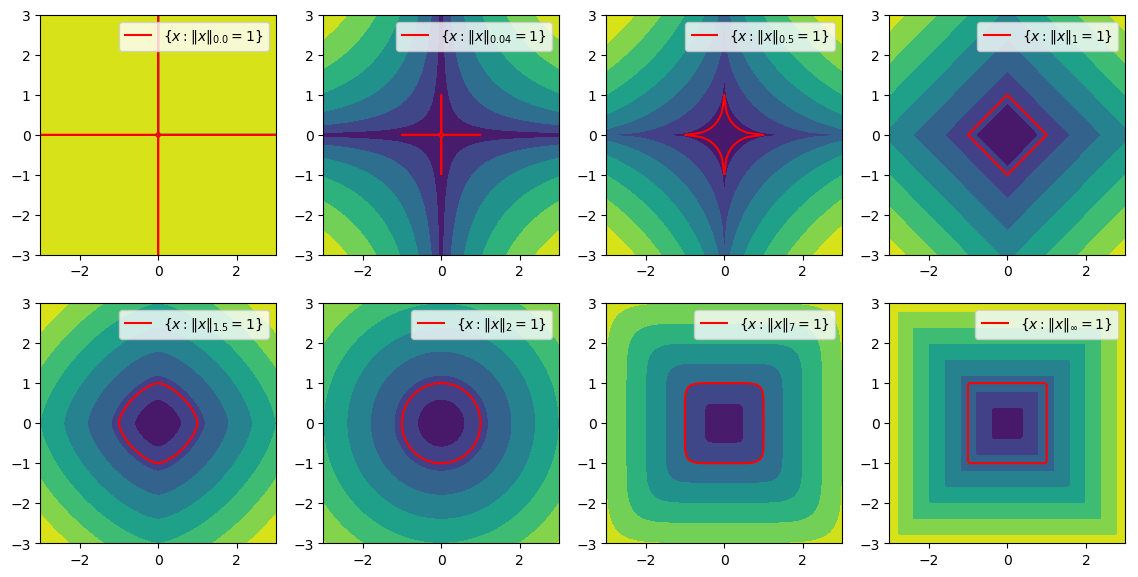

In [10]:


p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution
    Z=np.zeros((2,xx.shape[0],xx.shape[1]))
    Z[0,:,:]=xx
    Z[1,:,:]=yy
    Z=np.linalg.norm(Z,axis=0,ord=p)
    
    
    ax.contourf(xx,yy, Z)
    contLine = ax.contour(xx,yy, Z, np.array([1]),colors="red")
    
    if(not p==np.inf):
        contLine.collections[0].set_label(r"$\lbrace x:  \Vert x \Vert_{"+str(p)+r"} = 1\rbrace$")
    else:
        contLine.collections[0].set_label(r"$\lbrace x:  \Vert x \Vert_\infty = 1\rbrace$")
    ax.legend() 
    ### END Solution

plt.show()


<br/>

## Task 9 (4 pt.)

Write a function, that accepts an array of real values, a set of splitting points
and returns the sample mean of all values that end up within **each bin**, defined
by two consecutive splitting points.

Example for $\mathtt{splits} = [-1, 0, 1]$ the bins are
\begin{equation}
    \mathtt{bins} = \bigl[[-\infty, -1), [-1, 0), [0, +1), [+1, +\infty)\bigr]\,.
\end{equation}

Look up functions *np.digitize* and *np.bincount*, and **pay close attention** to what they
return and how to correctly use them.

In [11]:
def means_in_bins(bin_splits, arr):
    """Compute the sample mean of the values within bins.

    Parametrs
    ---------
    bin_splits : array, 1 dimension, shape=(n_splits,)
        1d array of values in ascending order.

    arr : arraylike, 1 dimension
        1d array of values to be put in bins.
    
    Returns
    -------
    means : arrat, 1 dimensional, shape = (n_splits + 1,)
        The sample mean within each bin defined by `bin_splits`.

    Details
    -------
    The flat array `bin_splits` of size `n_splits` defines the following bins:
    (-inf, B[0]), ..., [B[i-1], B[i]), ..., [B[n_splits], +inf), where B denotes
    `bin_splits`. The vlaues in `arr` are assigned to each bin and then averages
    within each bin are computed.
    """
    bins = np.r_[-np.inf, bin_splits, +np.inf]

    ### BEGIN Solution
    arrDigitized = np.digitize(arr,bins)
    
    print((arrDigitized == np.arange(1,len(bins))[:,np.newaxis])*2)
    out = np.sum( np.multiply(np.ones((len(bins)-1,len(arr)))*arr,(arrDigitized == np.arange(1,len(bins))[:,np.newaxis])*1) ,axis=1) * 1/(np.bincount(arrDigitized)[1:])
    ### END Solution

    return out 


#means_in_bins(np.array([-1,0,1]),np.array([-2,-1,-0.5,-0.2,-0.2,0.2,0.2,0.4,5.4,2])) 
#some tests

<br/>

## Task 10 (2 pt.)

Write a function that takes a multidimentional real valued array with
**missing values** (represented by *NaN*) and returns its copy with the
missing values filled with the sample mean of all nonmissing values. If
the input array **contains nothing but missing values**, then fill it
with zero.

In [12]:
def fill_missing(arr):
    """Fill the missing values in an array with mean of nonmissing values.

    Parameters
    ---------
    arr : arraylike, multidimensional
        The real-valued array with missing values to be filled.

    Returns
    ----------
    out : arraylike, multidimensional
        A copy of the input array with filled missing values.
    """

    ### BEGIN Solution
    out=0 #init
    nans = np.isnan(arr)
    if(np.prod(nans)):
        out= np.zeros(arr.shape)
    else:
        out = np.copy(arr) # out is not the same as arr
        out[nans]=np.mean(out[~nans])
    ### END Solution

    return out

#tests
#print(fill_missing(np.array([[1,2,np.nan],[0,np.nan,np.nan],[3,1,np.nan]])))
#print(fill_missing(np.array([[np.nan,np.nan,np.nan],[np.nan,np.nan,np.nan],[np.nan,np.nan,np.nan]])))


<br/>

## Task 11 (2 pt.)

[pandas](https://pandas.pydata.org/pandas-docs/stable/) is great, no doubt about it,
but in some cases you might need a bit simpler solution. In this task you are asked
to load some text data with **missing** values using [Numpy's API](https://docs.scipy.org/doc/numpy/reference/routines.io.html) and apply `fill_missing`
to it. You will have to **tweak some parameters** the data loader call.

P.S.: You might want to look up what **io.StringIO** does in Python.
P.P.S: Generally pandas's data loaders are by far more versatile than numpy's,
take, for example, [pd.read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html), [pd.read_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html), [pd.read_json](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) and
others.

In [13]:
from io import StringIO
from io import BytesIO #for some reason genfromtxt returned ERROR: CAn't convert bytes to str when using StringIO

data = b"""version 8.0.0815
    Some irrelevant garbage before the data block
    @first line of data block is a comment
    1.||65.21|4|5.87||||9|5.4||
    @this is another pertinent comment
    |3.1|4|||8.7|45|1||9|-3.654|15
    """

### BEGIN Solution
stream = BytesIO(data)

print(fill_missing(np.genfromtxt(stream,delimiter="|",comments="@",filling_values=np.nan,skip_header=2)))


    
### END Solution

[[  1.          12.33042857  65.21         4.           5.87        12.33042857
   12.33042857  12.33042857   9.           5.4         12.33042857
   12.33042857]
 [ 12.33042857   3.1          4.          12.33042857  12.33042857   8.7
   45.           1.          12.33042857   9.          -3.654       15.        ]]


<br/>

## Task 12 (4 pt.)

Write a function that solves the following optimization problem for any
$X \in \mathbb{R}^{N\times d}$, $y\in \mathbb{R}^{N}$ and $C > 0$:
\begin{equation}
    \begin{aligned}
        & \underset{\beta, \beta_0}{\text{minimize}}
          & & \tfrac12 \|X \beta + \mathbf{1}\beta_0 - y\|^2 + \tfrac{C}2\|\beta\|^2
              \,,
    \end{aligned}
\end{equation}
where $\|\cdot\|^2$ is the squared $l^2$ norm, and $\mathbf{1}$ is a column vector of ones.
You will have to derive the explicit solution and implement it using numpy.

### Solution

1. Write out the FOC for $\beta_0$ and solve it for $\beta_0$.

Using chain rule one can obtain $$
\nabla_\beta F = X^T(X\beta+\mathbf{1}\beta_0-y)+C\beta
$$
and $$\partial_{\beta_0} F = \sum_{i=1}^N(x_{i\cdot}\beta+\beta_0-y_i)=N\beta_0+\mathbf{1}^T(X\beta -y).$$

From first-order condition,
$$
\beta_0= \frac{1}{N}\mathbf{1}^T(y-X\beta)
$$


2. Plug $\beta_0$ into the objective and write out the new optimization problem. Observe how $X$ and $y$ are augmented.
$$
F= \tfrac12 \|X \beta + \frac{1}{N}\mathbf{1}\mathbf{1}^T(y-X\beta) - y\|^2 + \tfrac{C}2\|\beta\|^2.
$$



3. Get the FOC for $\beta$ for the new problem and solve it.

First-order condition implies
$\nabla F = (X-\frac{1}{N}\mathbf{1}\mathbf{1}^TX)^T(X\beta+\frac{1}{N}\mathbf{1}\mathbf{1}^T(y-X\beta)-y)+C\beta =0$, so in order to find $\beta$ we need to solve the corresponding linear system
$$
((X-\frac{1}{N}\mathbf{1}\mathbf{1}^TX)^T(X-\frac{1}{N}\mathbf{1}\mathbf{1}^TX) +CI)\beta = (X-\frac{1}{N}\mathbf{1}\mathbf{1}^TX)^T(y- \frac{1}{N}\mathbf{1}\mathbf{1}^Ty),
$$
where $I$ is an identity matrix of valid size.

4. Recover $\beta_0$ from the known solution for $\beta$.

It can be done using 

$$
\beta_0= \frac{1}{N}\mathbf{1}^T(y-X\beta).
$$

Implement the function.

In [70]:
def ridge_leastsq(X, y, alpha=1.0):
    """Find the Ridge regression solution for the given dataset (X, y).
    
    Parameters
    ----------
    X : array, 2 dimensional, shape = (n_samples, n_features)
        The input feature matrix.

    y : array, 1 dimensional, shape = (n_samples,)
        The target values for the regression task.

    alpha : float
        The value of the ridge regularization coefficient.
    
    Returns
    -------
    intercept : float
        The optimal intercept term.
    beta : array, shape = (n_features,)
        The optimal ridge regression coefficients.
    """
    assert X.ndim == 2
    
    n_samples, n_features = X.shape
    assert y.ndim == 1 and len(y) == n_samples

    ### BEGIN Solution
    X_cent = X - np.ones(X.shape)* np.mean(X, axis=0)
    print(X_cent.T.dot((y-np.mean(y)*np.ones(y.shape)).reshape((y.shape[0],1))))
    #Note: of course, we should never invert the matrix, however np.linalg.solve performs regularization by default
    #in order to avoid it, I write np.linalg.inv instead of np.linalg.solve
    beta = np.linalg.inv(X_cent.T.dot(X_cent)+ alpha*np.eye(X.shape[1])).dot(X_cent.T.dot((y-np.mean(y)*np.ones(y.shape)).reshape(y.shape[0],1)))
    beta_0= np.mean( y - X.dot(beta))
    ### END Solution
    
    return beta_0, beta


(50,)


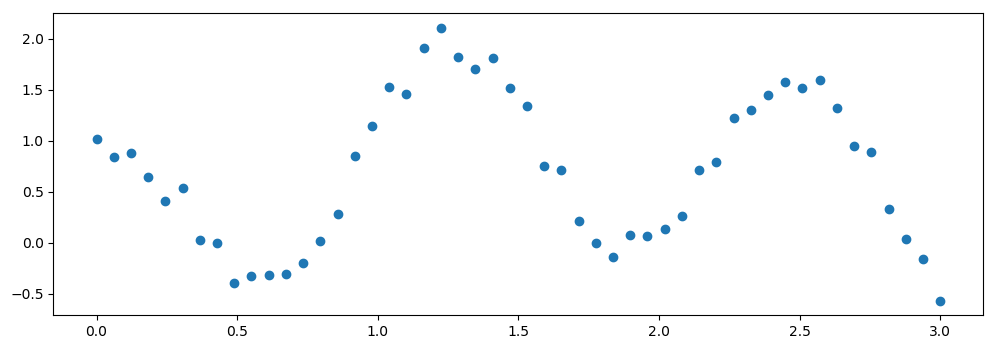

In [71]:
ts = np.linspace(0,3,50)
y = np.sin(ts)+np.cos(5*ts) + np.random.uniform(-0.2,0.2,50)
print(y.shape)
f, ax = plt.subplots(figsize=(12,4))

ax.scatter(ts,y)


[[  0.00000000e+00]
 [  3.46252747e+00]
 [  3.45889325e+00]
 [ -7.42959066e+00]
 [ -5.68603037e+01]
 [ -2.41163519e+02]
 [ -8.82022843e+02]
 [ -3.02656408e+03]
 [ -1.00203207e+04]
 [ -3.24000285e+04]]


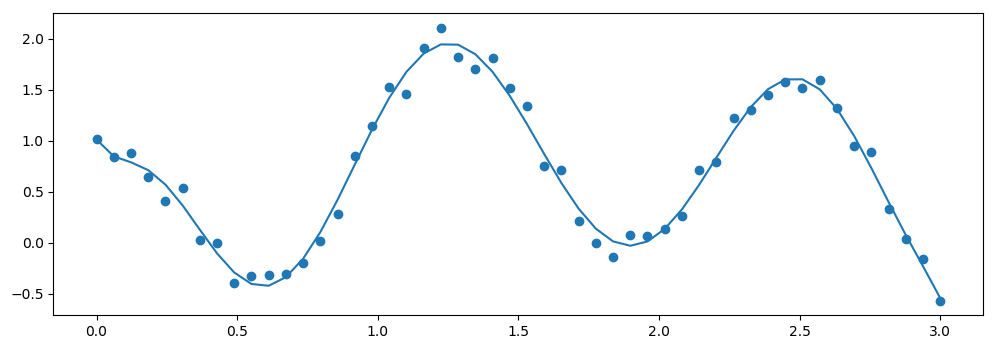

In [74]:
X = np.array([np.power(ts,k) for k in np.arange(0,10)]).T

print()
beta_0, beta = ridge_leastsq(X, y, alpha=1e-7)

f, ax = plt.subplots(figsize=(12,4))

ax.scatter(ts,y)
ax.plot(ts, X.dot(beta)+beta_0)


## Task 13 (6 pt., optional)

In this exercise you are asked to remember and use the
[Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular-value_decomposition)
to solve the previous task not for just one value of $C$,
but for an arbitrary flat array of positive regularization
coefficients.

**Hint** Carefully study the capabilities of [np.einsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.einsum.html)
and the parameters of [np.svd](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)
Then figure out a way to use just one call to SVD instead of multiple
matrix inversions.

**Remember**: avoid using python loops!

In [15]:
def ridge_path(X, y, alpha=(1.0,)):
    """Find the Ridge regression solution for the given dataset (X, y).
    
    Parameters
    ----------
    X : array, 2 dimensional, shape = (n_samples, n_features)
        The input feature matrix.

    y : array, 1 dimensional, shape = (n_samples,)
        The target values for the regression task.

    alpha : arraylike, 1 dimensional, shape = (n_coefficients,)
        The value of the ridge regularization coefficient.
    
    Returns
    -------
    intercept : array, 1 dimensional, shape = (n_coefficients,)
        The optimal intercept term for each value in `C`.
    beta : array, shape = (n_features, n_coefficients)
        The optimal ridge regression coefficients for each value in `C`.
    """
    assert X.ndim == 2

    n_samples, n_features = X.shape
    assert y.ndim == 1 and len(y) == n_samples
    
    alpha = np.asarray(alpha, dtype=float).ravel()
    assert np.all(alpha > 0)

    ### BEGIN Solution

    ### END Solution
    
    return beta_0, beta

<br/>